In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Visualise the Images

In [ ]:
import keras.utils as image

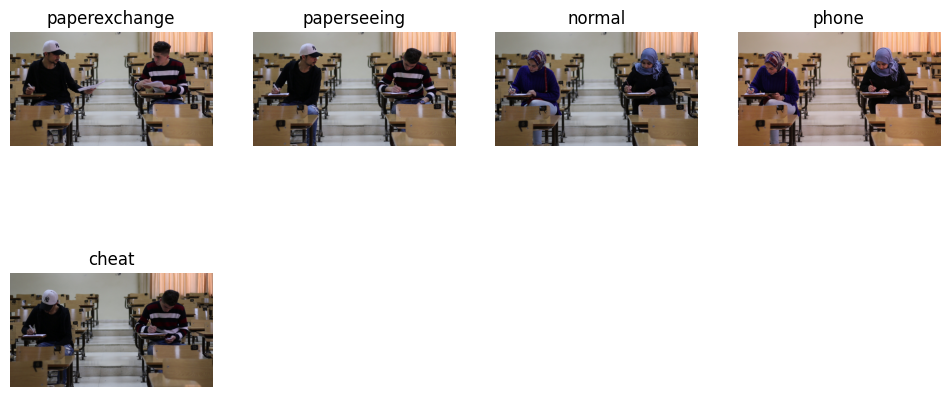

In [ ]:
# Let's plot a few images
train_path = "/content/drive/MyDrive/Deep2Neuron_Internship/EXAM/EXAM1/train"
validation_path = "/content/drive/MyDrive/Deep2Neuron_Internship/EXAM/EXAM1/validation"
test_path = "/content/drive/MyDrive/Deep2Neuron_Internship/EXAM/EXAM1/validation2"

image_categories = os.listdir('/content/drive/MyDrive/Deep2Neuron_Internship/EXAM/EXAM1/train')

def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0


        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Call the function
plot_images(image_categories)


# Prepare the Dataset

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 2976 images belonging to 5 classes.
Found 735 images belonging to 5 classes.
Found 422 images belonging to 5 classes.


In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'cheat', 1: 'normal', 2: 'paperexchange', 3: 'paperseeing', 4: 'phone'}


# Building a CNN model

In [ ]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 87616)             0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator,
                 epochs=20,
                 verbose=1,
                 validation_data=val_image_generator,
                 callbacks=early_stopping)

Epoch 1/20
93/93 [==============================] - 134s 1s/step - loss: 0.6173 - accuracy: 0.7772 - val_loss: 7.6979e-04 - val_accuracy: 1.0000
Epoch 2/20
93/93 [==============================] - 129s 1s/step - loss: 0.0255 - accuracy: 0.9933 - val_loss: 1.4635e-05 - val_accuracy: 1.0000
Epoch 3/20
93/93 [==============================] - 146s 2s/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 9.1586e-06 - val_accuracy: 1.0000
Epoch 4/20
93/93 [==============================] - 128s 1s/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 1.2444e-05 - val_accuracy: 1.0000
Epoch 5/20
93/93 [==============================] - 145s 2s/step - loss: 0.0111 - accuracy: 0.9960 - val_loss: 2.3420e-07 - val_accuracy: 1.0000
Epoch 6/20
93/93 [==============================] - 129s 1s/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 6.5281e-07 - val_accuracy: 1.0000
Epoch 7/20
93/93 [==============================] - 129s 1s/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 1.1840e-08 - val_ac

**Model trained for 20 Epochs**

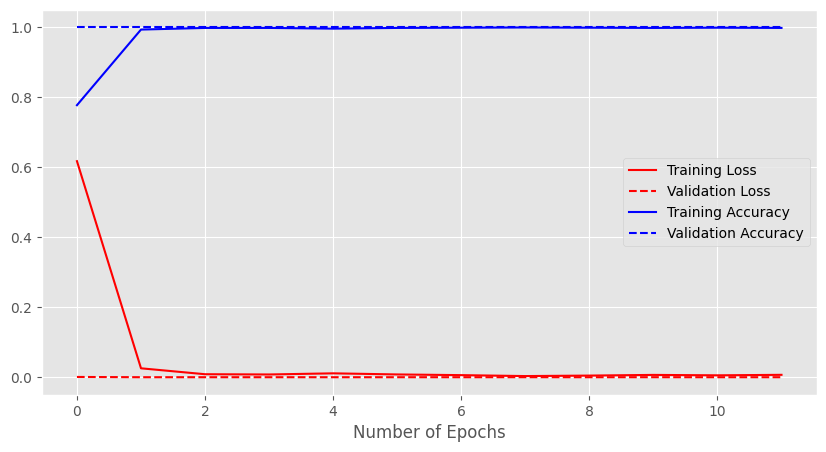

In [ ]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

14/14 [==============================] - 15s 1s/step - loss: 7.0054e-07 - accuracy: 1.0000


[7.005407951510279e-07, 1.0]

1/1 [==============================] - 0s 101ms/step


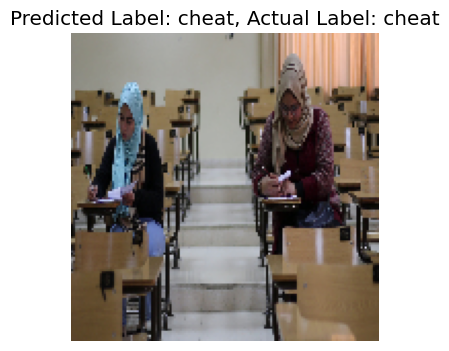

In [ ]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Deep2Neuron_Internship/EXAM/EXAM1/validation2/cheat/675.jpg'

def generate_predictions(test_image_path, actual_label):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='cheat')

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Generate predictions for the test set
test_predictions = model.predict(test_image_generator)
test_labels = test_image_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, np.argmax(test_predictions, axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

14/14 [==============================] - 15s 1s/step


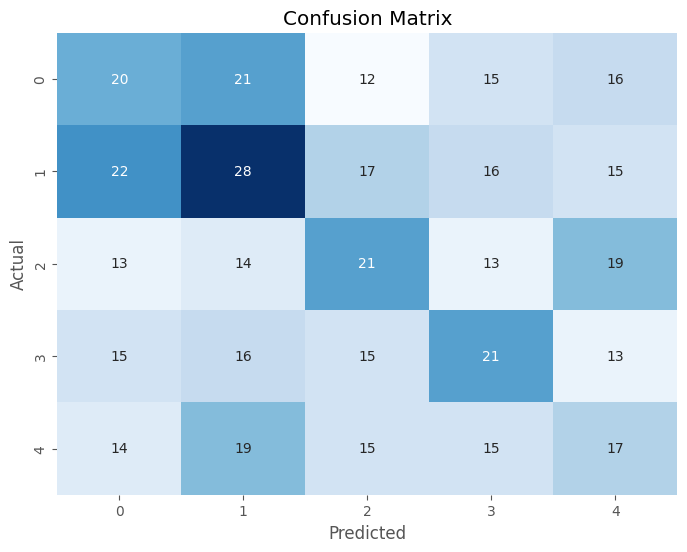

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()